zone_1:


0.6672620284121115
zone_2:


2.355616171514662
zone_3:


6.287011862184244
zone_4:


11.629434047119407
zone_5:


5.08021301863669
zone_6:


12.364540843476226
zone_7:


13.511878108100932
zone_8:


15.081203616460288


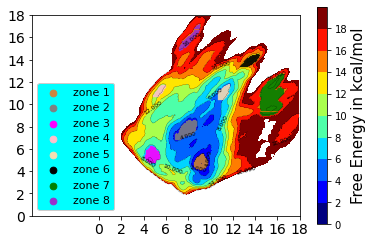

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 21 17:30:07 2019

@author: keshavpatil
"""

# This code reads the fes.dat file generated by PLUMED 
# and plots the contour plot for free energy, if there are only two
# collective variables.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


with open('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/free_ener_wt/8us/fes_8us_wt_mintozero.dat') as f:
    
    lines = f.readlines()
    
    
    
#lines = lines[9:2659]

new_lines = []    
# Get rid of empty lines
for line in lines:
    # Strip whitespace, should leave nothing if empty line was just "\n"
    if not line.strip():
        continue
    # We got something, save it
    else:
        new_lines.append(line)
        
lines = new_lines[9:]
    
bin_size_active = 201 # This was set in the PLUMED simulation
bin_size_inactive = 201
x = []
y1 = [] # stores the active coordinates
y2 = [] # stores the inactive coordinates
z1 = []
z = np.zeros((1,bin_size_inactive))
for i in range(0,len(lines)):
    
    words = lines[i].split()
    int_lst = [float(x) for x in words]
   
    y1.append(int_lst[0]) #y1 takes in active rmsd coordinates
    y2.append(int_lst[1]) #y2 takes in inactive rmsd coordinates
    z1.append(int_lst[2])  #z takes the free energy
 
            
y1 = np.array(y1)
y2 = np.array(y2)

y1 = y1[0:bin_size_inactive]
y2 = y2[0:len(lines):bin_size_inactive]



# making a 2-D matrix z
for i in range(0,len(z1),bin_size_active):
    z = np.r_[z,[z1[i:i+bin_size_active]]] 


# deleting the first row of all zeros in z
z = np.delete(z, (0), axis=0)

#z = z[::-1]
x,y = np.meshgrid(y1,y2)


# We take the coordinates (3,4) as reference
# More correctly, we take the bin number [46][63] as our
# references in all the profiles from now on
#z = z - z[46][63]



x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(70+1,155):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(25+1,77):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[70+1:155] for i in z[25+1:77]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 2), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='peru', edgecolors='peru',label='zone 1')


sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 2:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_1:")
print('\n')
print(F_st)















###################################################---ZONE2---------#################################################

x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(60+1,95):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(70+1,100):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[60+1:95] for i in z[70+1:100]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 3.75), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='grey', edgecolors='grey',label='zone 2')
sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 3.75:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_2:")
print('\n')
print(F_st)

###############-------------------ZONE3-------------------------####################################
x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(20+1,55):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(50+1,100):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[20+1:55] for i in z[50+1:100]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 7.8), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='magenta', edgecolors='magenta',label='zone 3')
#plt.scatter(x11, y11, s=1, color='white',marker='s')
#plt.axvline(x=3.8)   
#plt.axhline(y=3) 
# computing the free energy of the state: F_st = -(1/beta)log (Σ exp(-beta F(x,y)))
#beta = 1/K_b T = 1/0.6 = 1.66
sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 7.8:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_3:")
print('\n')
print(F_st)
        
#masking the overall matrix z 
#plt.plot(4.72,5.47,'wx',markersize=4)
                           

z =np.ma.masked_where((20 < z) & (z < 100), z)
contours = plt.contour( x,y,z, 10, colors='black',linewidths=0.2)
plt.clabel(contours, inline=True, fontsize=6)
cmap = plt.cm.get_cmap("jet", 10)
cax = plt.imshow(z, extent=[min(y1), max(y1), min(y2), max(y2)], origin='lower',
          cmap=cmap)#,ylabel='kkk')

cbar = plt.colorbar(cax, ticks=[0,2,4,6,8,10,12,14,16,18,20])
cbar.ax.set_yticklabels(['0','2','4','6','8','10','12','14','16','18','20'])
#plt.clim(z.min(),z.max())


#comap = plt.colorbar()
cbar.set_label('Free Energy in kcal/mol', rotation=90,fontsize=15 )   
#plt.title('MEK WT',fontsize=15)
xx = [i for i in range(0,19,2)]
plt.xticks(xx)



plt.ylim((0,18))
plt.xlim((0,18))
xx = [i for i in range(0,21,2)]
plt.xticks(xx)
plt.yticks(xx)

#plt.xlabel('RMSD to active',fontsize=20)
#plt.ylabel('RMSD to inactive',fontsize=20)

#plt.xticks(np.arange(np.min(y1), np.max(y1), 10))
#plt.yticks(np.arange(np.min(y2), np.max(y2), 10))                                
#plt.colorbar()#(ticks=range(0,12,2),label='Kcal/mol')
#plt.title('HILLS',fontsize=20



###############-------------------ZONE4-------------------------####################################

##########################################################################################


###############-------------------ZONE5-name it ZONE4------------------------##########################
x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(40+1,60):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(115+1,130):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[40+1:60] for i in z[115+1:130]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((10 < zz) & (zz < 12), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='pink', edgecolors='pink',label='zone 5')
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='pink', edgecolors='pink',label='zone 4')
#######################################################################
sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 10 < zz[i][j] <= 12:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_4:")
print('\n')
print(F_st)
##############-------------------ZONE6--name it ZONE5------------------------##########################
x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(112+1,125):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(112+1,130):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[112+1:125] for i in z[112+1:130]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 6), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='wheat', edgecolors='wheat',label='zone 6')
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='wheat', edgecolors='wheat',label='zone 5')


sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 6:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_5:")
print('\n')
print(F_st)

########################################################################################
########################################################################################

###############-------------------ZONE7-name it ZONE6-------------------------##########################
x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(135+1,158):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(145+1,160):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[135+1:158] for i in z[145+1:160]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 14), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='black', edgecolors='black',label='zone 7')
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='black', edgecolors='black',label='zone 6')



sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 14:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_6:")
print('\n')
print(F_st)

############################################################################
#############################################################################
#############################################################################

###############-------------------ZONE8-name it ZONE7------------------------##########################
x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(155+1,180):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(85+1,140):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[155+1:180] for i in z[85+1:140]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 16), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
#plt.scatter(x_c_subset, y_c_subset, s=1, color='white',marker='s')
#plt.scatter(x11, y11, s=1, color='white',marker='s')


#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='green', edgecolors='green',label='zone 8')
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='green', edgecolors='green',label='zone 7')

sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 16:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_7:")
print('\n')
print(F_st)






###############-------------------ZONE8-------------------------##########################
x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(60+1,95):
    bin_width1 = (y1[-1] - y1[0]) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(160+1,190):
    bin_width2 =  (y2[-1] - y2[0]) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[60+1:95] for i in z[160+1:190]])

# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < 16), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    

# while 0 <= i < len(x_c_subset):
#     if x_c_subset[i] < 3 and y_c_subset[i] > 3:
        
#         x_c_subset.pop(i)
        
#         y_c_subset.pop(i)
#         i = i - 1       
        
#     i = i + 1       
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
#plt.scatter(x_c_subset, y_c_subset, s=1, color='white',marker='s')
#plt.scatter(x11, y11, s=1, color='white',marker='s')

sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 < zz[i][j] <= 16:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print("zone_8:")
print('\n')
print(F_st)
#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='green', edgecolors='green',label='zone 8')
plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='darkorchid', edgecolors='darkorchid',label='zone 8')
##########################################################################
plt.xlim((-6,18))
plt.ylim((0,18))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('MEK Wild Type')
plt.legend(loc='lower left',prop={"size":11}, markerscale=15,facecolor='cyan', framealpha=1)
#plt.savefig('zone1235678.png', bbox_inches = 'tight', dpi = 300)
plt.savefig('zone1235.png', bbox_inches = 'tight', dpi = 300)
plt.show()







